# K-Means Clustering 

K-Means algorithm clusters a set of data points by trying to seperate them inro k groups in such a way that there is maximum similarity between points inside a cluster and maximum variance across clusters
It works as follows:

    Step 1: Select an appropriate value for  𝑘 , which is the number of clusters

    Step 2: Select random centroids for each cluster

    Step 3: Assign each data point to its closest centroid

    Step 4: Adjust the centroid for the newly formed clusters in Step 3

    Step 5: Repeating Step 3 and Step 4 till there is no significant change in centroid position

In [134]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
data = pd.read_csv("data_clustering.csv")

In [6]:
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [8]:
data['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [11]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [12]:
data.describe(include = 'all')

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [14]:
data.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

Text(0, 0.5, 'Glucose')

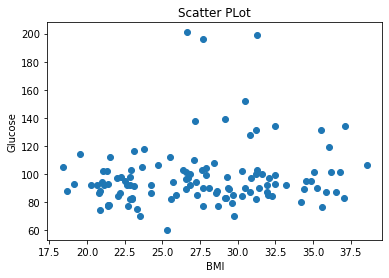

In [27]:
#plt.scatter(data['Glucose'], data['Insulin'])
#plt.scatter(data['Adiponectin'], data['Resistin'])
plt.scatter(data['BMI'], data['Glucose'])
plt.title('Scatter PLot')
plt.xlabel('BMI')
plt.ylabel('Glucose')
#plt.scatter(data['Insulin'], data['HOMA'])

In [22]:
X= data[['Insulin' , 'HOMA']]

In [23]:
X

,Insulin,HOMA
0,2.707,0.467409
1,3.115,0.706897
2,4.498,1.009651
3,3.226,0.612725
4,3.549,0.805386
...,...,...
111,3.330,0.755688
112,4.530,1.117400
113,5.730,1.370998
114,2.820,0.570392


In [46]:
#importing Kmesns class from Scikit-learn
from sklearn.cluster import KMeans


In [47]:
Kmeans = KMeans(2, random_state =10)

In [57]:
Kmeans.fit(X)

KMeans(n_clusters=2, random_state=10)

In [58]:
Kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

In [56]:
Kmeans.cluster_centers_

array([[ 56.56470588,  27.0235648 ,  94.94117647,   9.11237647,
          2.27242944,  25.70536235,  10.74593924,  12.16660941,
        372.1204    ,   1.52941176],
       [ 59.32258065,  29.11360799, 105.61290323,  12.47903226,
          3.85361469,  29.10946774,   8.63150145,  21.74355613,
        980.28445161,   1.61290323]])

In [51]:
data_new = data.copy()
data_new['cluster'] = Kmeans.labels_
data_new.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,0


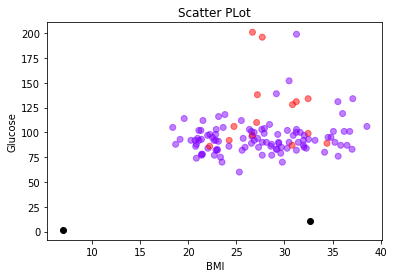

In [53]:
plt.scatter(data_new['BMI'], data_new['Glucose'],c= data_new['cluster'],cmap='rainbow', alpha = .5)
plt.plot(Kmeans.cluster_centers_[0,0], Kmeans.cluster_centers_[0,1], c= 'k', marker = 'o')
plt.plot(Kmeans.cluster_centers_[1,0], Kmeans.cluster_centers_[1,1], c= 'k', marker = 'o')
plt.title('Scatter PLot')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.show()
#plt.scatter(data['Insulin'], data['HOMA'])

# Selecting the number of clusters¶

To select optimal no. of clusters, we check within-cluster sum of squares (WCSS), which is the sum of squares of the distances of each data point in all clusters to their respective centroids.

Mathematically, it is defined as follows for  $n$ clusters:

$$ WCSS = \sum\limits_{C_i, \,\, i=1,\ldots,n} \left( \sum\limits_{d_j \,\,in \,\, C_i} (dist(d_j, C_i))^2 \right) $$

 
We then use the 'Elbow Method' to find the optimal no. of clusters.

In [59]:
Kmeans.inertia_

4098.601052584447

C:\Users\soura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


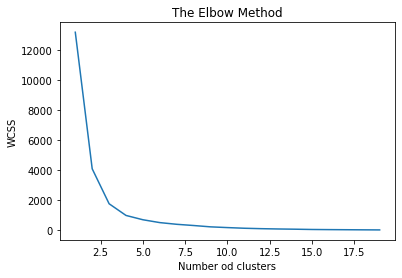

In [61]:
#plotting WCSS for different no. of clusters
wcss = []
for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number od clusters')
plt.ylabel('WCSS')
plt.show()

In [79]:
Kmeans = KMeans(2, random_state=11)
Kmeans.fit(X)

KMeans(n_clusters=2, random_state=11)

In [80]:
Kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

In [81]:
Kmeans.cluster_centers_

array([[ 6.89931373,  1.66630458],
       [32.69085714, 10.1896779 ]])

In [82]:
data_new  =data.copy()
data_new['Clusters'] = Kmeans.labels_
data_new.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,Clusters
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,0


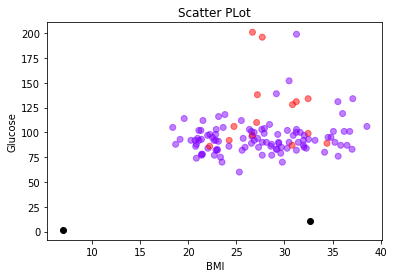

In [84]:
plt.scatter(data_new['BMI'], data_new['Glucose'],c= data_new['Clusters'],cmap='rainbow', alpha = .5)
plt.plot(Kmeans.cluster_centers_[0,0], Kmeans.cluster_centers_[0,1], c= 'k', marker = 'o')
plt.plot(Kmeans.cluster_centers_[1,0], Kmeans.cluster_centers_[1,1], c= 'k', marker = 'o')
#plt.plot(Kmeans.cluster_centers_[2,0], Kmeans.cluster_centers_[2,1], c= 'k', marker = 'o')
#plt.plot(Kmeans.cluster_centers_[3,0], Kmeans.cluster_centers_[3,1], c= 'k', marker = 'o')
plt.title('Scatter PLot')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.show()
#plt.scatter(data['Insulin'], data['HOMA'])

# Kmean cluster with all feature

In [166]:
X= data.loc[: ,['Age','Glucose','Insulin']]

In [137]:
X.head(2)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786


C:\Users\soura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


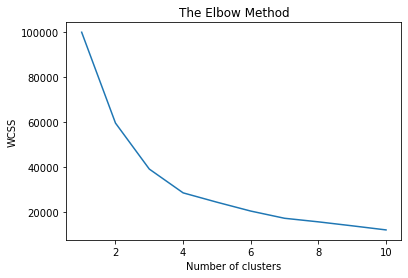

In [167]:
wcss =[]

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [168]:
kmeans = KMeans(2, random_state=12)
kmeans.fit(X)


KMeans(n_clusters=2, random_state=12)

In [169]:
centroids = kmeans.cluster_centers_
centroids

array([[ 66.18181818, 153.        ,  23.61690909],
       [ 56.37142857,  92.00952381,   8.58681905]])

In [170]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0])

In [171]:
data_new = X.copy()
data_new['Clusters'] = kmeans.labels_
data_new.head(2)


,Age,Glucose,Insulin,Clusters
0,48,70,2.707,1
1,83,92,3.115,1


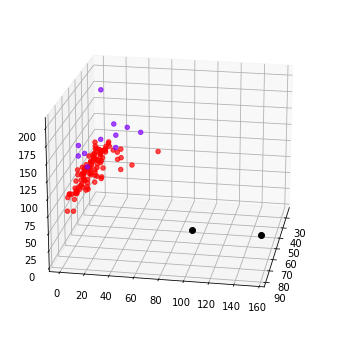

In [174]:
#2D visualization
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.view_init(20, 10)
ax.scatter3D(data_new['Age'],data_new['Insulin'], data_new['Glucose'],c=data_new['Clusters'] ,cmap = 'rainbow',alpha=.7)
ax.plot([centroids[0,0]],[centroids[0,1]],[centroids[0,2]],c ='k', marker ='o')
ax.plot([centroids[1,0]],[centroids[1,1]],[centroids[1,2]],c='k', marker ='o')

plt.show()

In [175]:
data_new['compair'] = np.where(data['Classification'] == data_new['Clusters'],"True", "False")

In [176]:
data_new['compair'].value_counts()

False    64
True     52
Name: compair, dtype: int64